# Load Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Steps to be followed:<br>
    1. Understanding the problem statement.<br>
    2. Hypothesis Generation.<br>
    3. Getting the system ready and loading the data.<br>
    4. Understanding the data.<br>
    5. Exploratory Data Analysis(EDA).<br>
        Univariate Analysis<br>
        Bivariate Analysis<br>
    6. Missing value and outlier.<br>
    7. Evaluation metrics.<br>
    8. Model building -1 (Most easy model).<br>
    9. k-fold cross validation.<br>
    10. Feature Engineering.<br>
    11. Model building -2 (Comparison).<br>

##  Exploratory Data Analysis (EDA)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_copy = train.copy()
test_copy = test.copy()

In [5]:
train_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


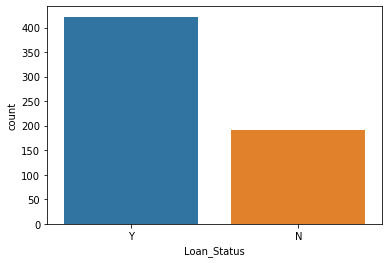

In [8]:
sns.countplot(x='Loan_Status', data=train)

### Univariate Data Analysis

#### CATEGORICAL

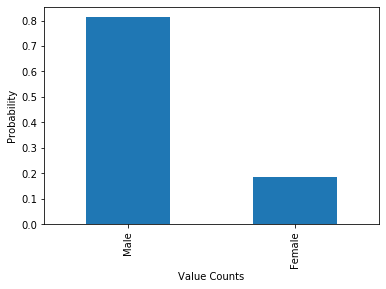

In [9]:
train_copy.Gender.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

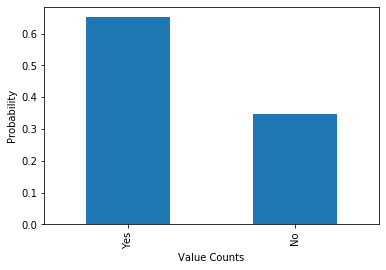

In [10]:
train_copy.Married.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

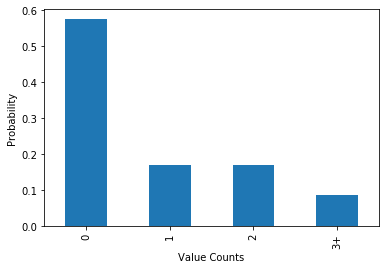

In [11]:
train_copy.Dependents.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

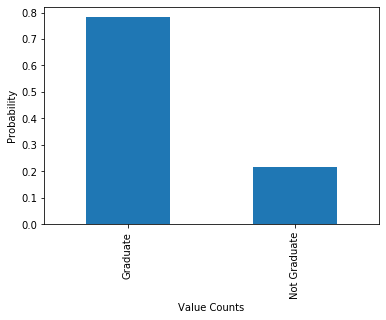

In [12]:
train_copy.Education.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

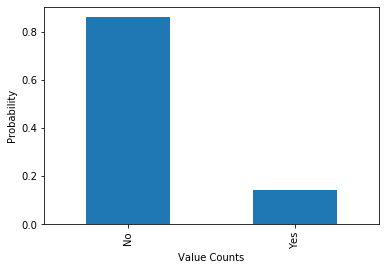

In [13]:
train_copy.Self_Employed.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

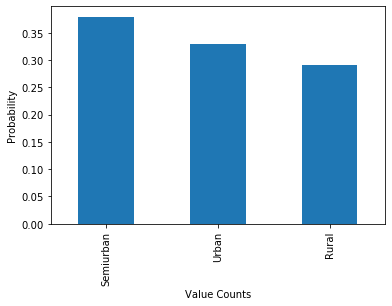

In [14]:
train_copy.Property_Area.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

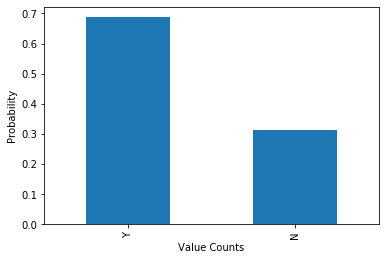

In [15]:
train_copy.Loan_Status.value_counts(normalize=True).plot.bar()
plt.xlabel('Value Counts')
plt.ylabel('Probability')
plt.show()

#### NUMERICAL

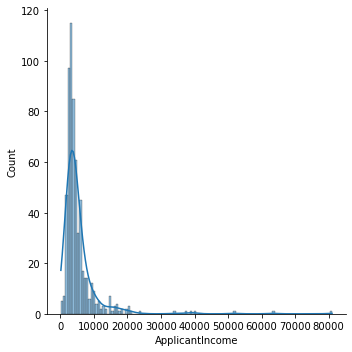

In [16]:
sns.displot(train_copy.ApplicantIncome, kde='True')
plt.show()

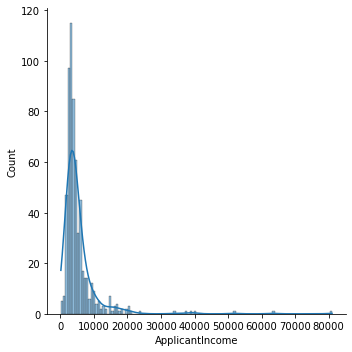

In [17]:
sns.displot(train_copy.ApplicantIncome, kde='True')
plt.show()

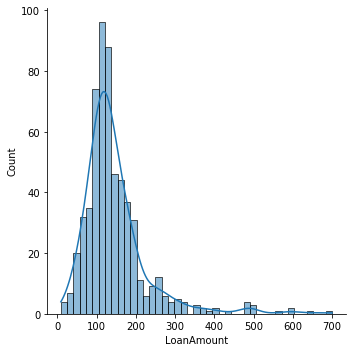

In [18]:
sns.displot(train_copy.LoanAmount, kde='True')
plt.show()

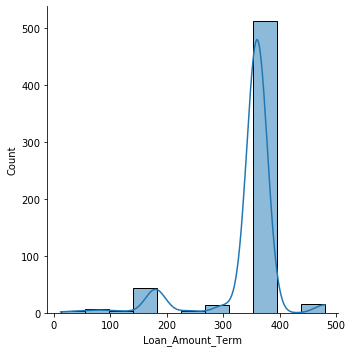

In [19]:
sns.displot(train_copy.Loan_Amount_Term, kde='True')
plt.show()

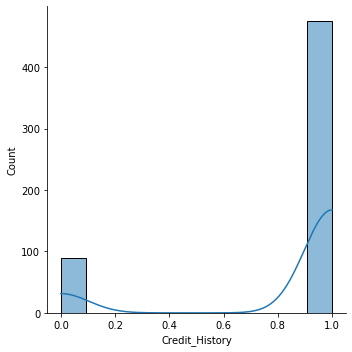

In [20]:
sns.displot(train_copy.Credit_History, kde='True')
plt.show()

### Bivariate Analysis

In [21]:
train.Dependents.replace('3+', 4, inplace=True)
test.Dependents.replace('3+', 4, inplace=True)

train.Dependents.replace('3', 3, inplace=True)
test.Dependents.replace('3', 3, inplace=True)

train.Dependents.replace('2', 2, inplace=True)
test.Dependents.replace('2', 2, inplace=True)

train.Dependents.replace('1', 1, inplace=True)
test.Dependents.replace('1', 1, inplace=True)

train.Dependents.replace('0', 0, inplace=True)
test.Dependents.replace('0', 0, inplace=True)

train.Loan_Status.replace('Y', 1, inplace=True)
train.Loan_Status.replace('N', 0, inplace=True)

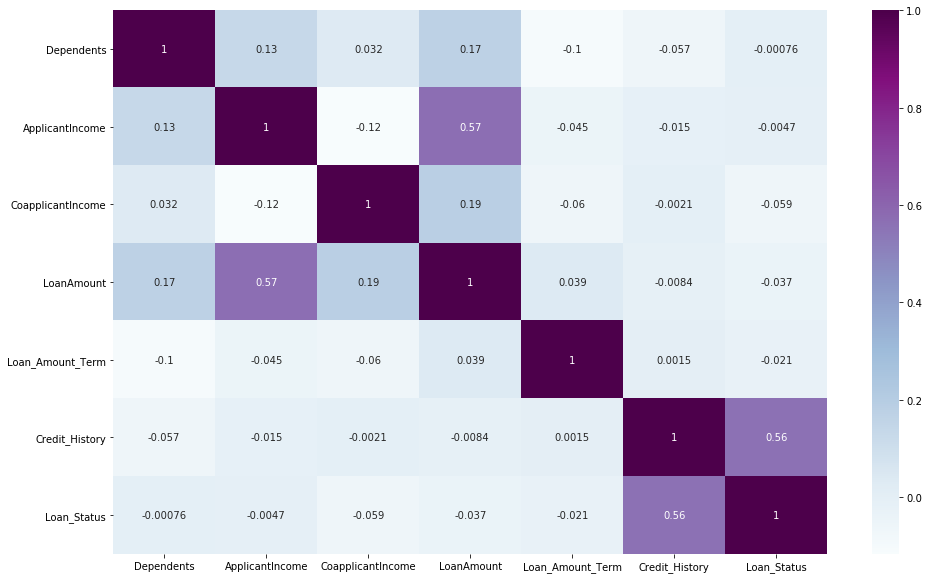

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), cmap='BuPu', annot=True)

## Null Values

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Categorical - Mode

In [25]:
train.Gender.fillna(train.Gender.mode()[0], inplace=True)
train.Married.fillna(train.Married.mode()[0], inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0], inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0], inplace=True)

In [26]:
test.Gender.fillna(test.Gender.mode()[0], inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0], inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0], inplace=True)

## Numerical - Mean/Median

In [27]:
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.median(), inplace=True)
train.Credit_History.fillna(train.Credit_History.median(), inplace=True)

In [28]:
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.median(), inplace=True)
test.Credit_History.fillna(test.Credit_History.median(), inplace=True)

## Outlier Detection - Log

In [29]:
train['LoanAmount_log'] = np.log(train.LoanAmount)
test['LoanAmount_log'] = np.log(test.LoanAmount)

## Feature Engineering

In [30]:
train['Total_Income'] = (train.ApplicantIncome + train.CoapplicantIncome)
test['Total_Income'] = (test.ApplicantIncome + test.CoapplicantIncome)

In [31]:
train['EMI'] = (train.LoanAmount / train.Loan_Amount_Term)
test['EMI'] = (test.LoanAmount / test.Loan_Amount_Term)

In [32]:
train['Balance'] = train.Total_Income - train.EMI * 1000
test['Balance'] = test.Total_Income - test.EMI * 1000

In [33]:
train.Total_Income = np.log(train.Total_Income)
test.Total_Income = np.log(test.Total_Income)

In [34]:
train.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1, inplace=True)
test.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1, inplace=True)

## Data split

In [35]:
train.Married.replace('No', 0, inplace=True)
train.Married.replace('Yes', 1, inplace=True)

train.Self_Employed.replace('No', 0, inplace=True)
train.Self_Employed.replace('Yes', 1, inplace=True)

test.Married.replace('No', 0, inplace=True)
test.Married.replace('Yes', 1, inplace=True)

test.Self_Employed.replace('No', 0, inplace=True)
test.Self_Employed.replace('Yes', 1, inplace=True)

In [36]:
X_train = train.iloc[:, [1,2,3,4,5,6,7,9,10,11,12]].values
y_train = train.iloc[:, 8].values

In [37]:
pred = test.iloc[:, 1:].values

In [38]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 3, 6])], remainder='passthrough')
X_train = transformer.fit_transform(X_train)

transformer_pred = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 3, 6])], remainder='passthrough')

pred = transformer_pred.fit_transform(pred)

In [39]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()

X_train, y_train = smk.fit_resample(X_train, y_train)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
 
X_train[:, 11:] = scaler.fit_transform(X_train[:, 11:])
pred[:, 11:] = scaler.transform(pred[:, 11:])

# Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

# Testing

In [43]:
y_pred = classifier.predict(pred)

In [44]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [45]:
y_pred_tranform = np.array(['Y' if value == 1 else 'N' for value in y_pred])

# Creating Sample

In [46]:
sample_dataset = pd.read_csv('test.csv')

In [47]:
sample = pd.DataFrame(columns=['Loan_ID', 'Loan_Status'])

In [48]:
sample.Loan_ID = sample_dataset.iloc[:, 0].values
sample.Loan_Status = y_pred_tranform

In [49]:
sample.to_csv('sample.csv', index=False)

In [ ]:
sns.scatterplot(x='Gender', y='Married', data=dataset, hue='Loan_Status')

In [51]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
# kf.get_n_splits(
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)
